**Project: NYC Motor Vehicle Collision Analysis**

**The Goal:** I wanted to dig into what actually causes car accidents in New York City. Using the NYPD collision data, I focused on identifying the "Contributing Factors" to see what drivers should be most careful about.

In [2]:
import pandas as pd

# This URL uses the SODA API to get the 10,000 most recent records.
# Using a sample like this makes it load very fast!
url = "https://data.cityofnewyork.us/resource/h9gi-nx95.csv?$limit=10000"

# Read the data from the URL into a "DataFrame" (which is like a big Excel sheet)
print("Downloading data from NYC OpenData...")
df = pd.read_csv(url)
print("Data loaded successfully!")

# Now, let's look at the first 5 rows to see what we've got
df.head()

Data loaded successfully!


,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2021-09-11T00:00:00.000,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,2022-03-26T00:00:00.000,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,2023-11-01T00:00:00.000,1:29,BROOKLYN,11230.0,40.62179,-73.970024,"\n, \n(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,2022-06-29T00:00:00.000,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,2022-09-21T00:00:00.000,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


**Phase 1: Selecting the Right Data**

This dataset has a lot of extra information like latitudes and longitudes. For this specific analysis, I'm narrowing it down to the "Contributing Factor" column so I can focus purely on the "why" behind these accidents.

In [3]:
# Select just the one column we want to inspect
column_to_check = df['contributing_factor_vehicle_1']

# Get the counts of each unique value in that column
print("Looking at the causes for 'Vehicle 1'...")
print(column_to_check.value_counts())

Looking at the causes for 'Vehicle 1'...
contributing_factor_vehicle_1
Unspecified                                              2491
Driver Inattention/Distraction                           2392
Following Too Closely                                     704
Failure to Yield Right-of-Way                             662
Passing or Lane Usage Improper                            463
Passing Too Closely                                       412
Unsafe Speed                                              382
Traffic Control Disregarded                               305
Backing Unsafely                                          303
Other Vehicular                                           292
Turning Improperly                                        233
Driver Inexperience                                       196
Unsafe Lane Changing                                      185
Alcohol Involvement                                       153
Reaction to Uninvolved Vehicle                            137

In [4]:
# Print all the column names exactly as Pandas sees them
print("Here are the exact column names:")
print(df.columns)

Here are the exact column names:
Index(['crash_date', 'crash_time', 'borough', 'zip_code', 'latitude',
       'longitude', 'location', 'on_street_name', 'off_street_name',
       'cross_street_name', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5',
       'collision_id', 'vehicle_type_code1', 'vehicle_type_code2',
       'vehicle_type_code_3', 'vehicle_type_code_4', 'vehicle_type_code_5'],
      dtype='object')


In [5]:
# Select the column using the *exact* name you just found
column_to_check = df['contributing_factor_vehicle_1']

# Get the counts of each unique value in that column
print("Looking at the causes for 'Vehicle 1' (this time it will work!):")
print(column_to_check.value_counts())

Looking at the causes for 'Vehicle 1' (this time it will work!):
contributing_factor_vehicle_1
Unspecified                                              2491
Driver Inattention/Distraction                           2392
Following Too Closely                                     704
Failure to Yield Right-of-Way                             662
Passing or Lane Usage Improper                            463
Passing Too Closely                                       412
Unsafe Speed                                              382
Traffic Control Disregarded                               305
Backing Unsafely                                          303
Other Vehicular                                           292
Turning Improperly                                        233
Driver Inexperience                                       196
Unsafe Lane Changing                                      185
Alcohol Involvement                                       153
Reaction to Uninvolved Vehicle       

In [6]:
# 1. First, make a list of the exact column names we want to combine
factor_columns = [
    'contributing_factor_vehicle_1',
    'contributing_factor_vehicle_2',
    'contributing_factor_vehicle_3',
    'contributing_factor_vehicle_4',
    'contributing_factor_vehicle_5'
]

# 2. Use pd.melt() to "unpivot" or "stack" these columns
# This takes all the values from the 5 columns and puts them into one single column
all_factors = df.melt(value_vars=factor_columns, value_name='Contributing Factor')

print("Original data shape (rows, columns):", df.shape)
print("New 'melted' data shape (rows, columns):", all_factors.shape)
print("\nFirst 5 rows of our new 'all_factors' data:")
print(all_factors.head())

Original data shape (rows, columns): (10000, 29)
New 'melted' data shape (rows, columns): (50000, 2)

First 5 rows of our new 'all_factors' data:
                        variable           Contributing Factor
0  contributing_factor_vehicle_1  Aggressive Driving/Road Rage
1  contributing_factor_vehicle_1             Pavement Slippery
2  contributing_factor_vehicle_1                   Unspecified
3  contributing_factor_vehicle_1         Following Too Closely
4  contributing_factor_vehicle_1           Passing Too Closely


In [7]:
# Get the value counts for our new combined column
total_counts = all_factors['Contributing Factor'].value_counts()

print("Total counts from all 5 vehicle columns:")
print(total_counts)

Total counts from all 5 vehicle columns:
Contributing Factor
Unspecified                                              10570
Driver Inattention/Distraction                            2793
Following Too Closely                                      836
Failure to Yield Right-of-Way                              736
Passing or Lane Usage Improper                             539
Passing Too Closely                                        450
Other Vehicular                                            418
Unsafe Speed                                               416
Traffic Control Disregarded                                365
Backing Unsafely                                           315
Turning Improperly                                         257
Driver Inexperience                                        225
Unsafe Lane Changing                                       211
Reaction to Uninvolved Vehicle                             157
Alcohol Involvement                                      

In [8]:
# Get the value counts for our new combined column
total_counts = all_factors['Contributing Factor'].value_counts()

print("Total counts from all 5 vehicle columns:")
print(total_counts)

Total counts from all 5 vehicle columns:
Contributing Factor
Unspecified                                              10570
Driver Inattention/Distraction                            2793
Following Too Closely                                      836
Failure to Yield Right-of-Way                              736
Passing or Lane Usage Improper                             539
Passing Too Closely                                        450
Other Vehicular                                            418
Unsafe Speed                                               416
Traffic Control Disregarded                                365
Backing Unsafely                                           315
Turning Improperly                                         257
Driver Inexperience                                        225
Unsafe Lane Changing                                       211
Reaction to Uninvolved Vehicle                             157
Alcohol Involvement                                      

In [9]:
# Print the top 5 *before* cleaning, just to compare
print("Top 5 BEFORE cleaning:")
print(total_counts.head(5))

# Remove the 'Unspecified' row
# The 'inplace=False' (which is the default) means it won't change
# our original 'total_counts' list, but will instead create a new one.
cleaned_counts = total_counts.drop('Unspecified')

# Now print the top 5 *after* cleaning
print("\nTop 5 AFTER cleaning (real causes!):")
print(cleaned_counts.head(5))

Top 5 BEFORE cleaning:
Contributing Factor
Unspecified                       10570
Driver Inattention/Distraction     2793
Following Too Closely               836
Failure to Yield Right-of-Way       736
Passing or Lane Usage Improper      539
Name: count, dtype: int64

Top 5 AFTER cleaning (real causes!):
Contributing Factor
Driver Inattention/Distraction    2793
Following Too Closely              836
Failure to Yield Right-of-Way      736
Passing or Lane Usage Improper     539
Passing Too Closely                450
Name: count, dtype: int64


**Phase 2: Identifying the Top "Killers" on the Road**

Here, I'm ranking the top 10 reasons for crashes. I want to see if human behavior really is the primary cause. Seeing the data visualization makes it much easier to identify the biggest risks at a glance.

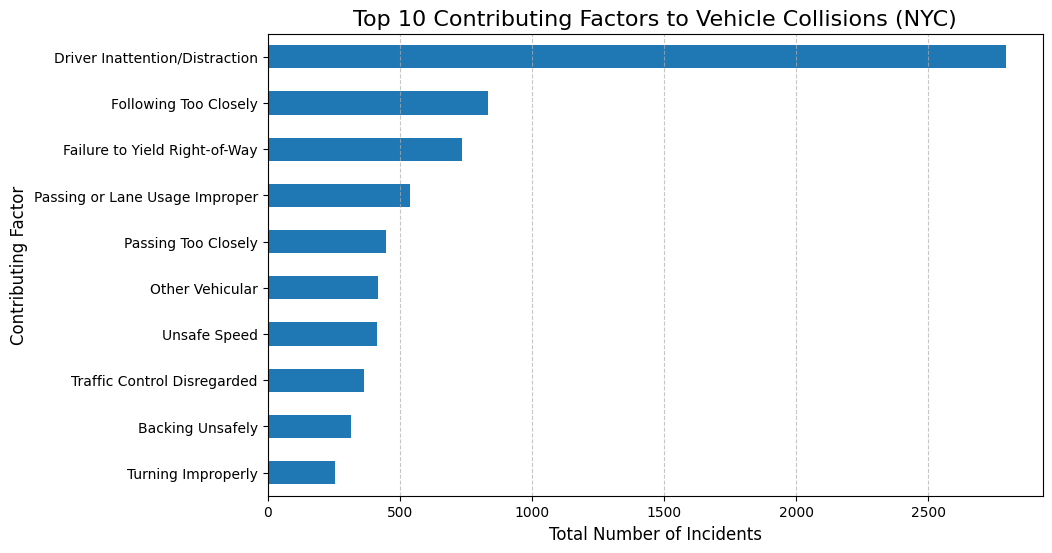

In [10]:
import matplotlib.pyplot as plt

# Get just the Top 10 from your clean list
top_10_causes = cleaned_counts.head(10)

# --- Create the plot ---
plt.figure(figsize=(10, 6))  # Set the size of the figure (width, height)

# Create the horizontal bar chart
# We use .sort_values() so the BIGGEST bar is at the top
top_10_causes.sort_values(ascending=True).plot(kind='barh')

# --- Add labels to make it professional ---
plt.title('Top 10 Contributing Factors to Vehicle Collisions (NYC)', fontsize=16)
plt.xlabel('Total Number of Incidents', fontsize=12)
plt.ylabel('Contributing Factor', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7) # Add gridlines for readability

plt.show() # Display the plot